# Sepsis Survival Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d joebeachcapital/sepsis-survival-minimal-clinical-records

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/sepsis-survival-minimal-clinical-records
License(s): Attribution 4.0 International (CC BY 4.0)
100%|█████████████████████████████████████████| 234k/234k [00:01<00:00, 218kB/s]
100%|█████████████████████████████████████████| 234k/234k [00:01<00:00, 218kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Sepsis Survival Prediction/sepsis-survival-minimal-clinical-records.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Sepsis Survival Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("s41598-020-73558-3_sepsis_survival_primary_cohort.csv")

In [7]:
df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [8]:
df.shape

(110204, 4)

In [9]:
df.size

440816

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_years,110204.0,62.735255,24.126806,0.0,51.0,68.0,81.0,100.0
sex_0male_1female,110204.0,0.473948,0.499323,0.0,0.0,0.0,1.0,1.0
episode_number,110204.0,1.349379,0.751799,1.0,1.0,1.0,1.0,5.0
hospital_outcome_1alive_0dead,110204.0,0.926455,0.261031,0.0,1.0,1.0,1.0,1.0


In [12]:
df.isnull().sum()

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.drop_duplicates(inplace=True)

In [18]:
df.nunique()

age_years                        101
sex_0male_1female                  2
episode_number                     5
hospital_outcome_1alive_0dead      2
dtype: int64

In [19]:
df['hospital_outcome_1alive_0dead'].value_counts()

hospital_outcome_1alive_0dead
1    975
0    536
Name: count, dtype: int64

## Data Visualization

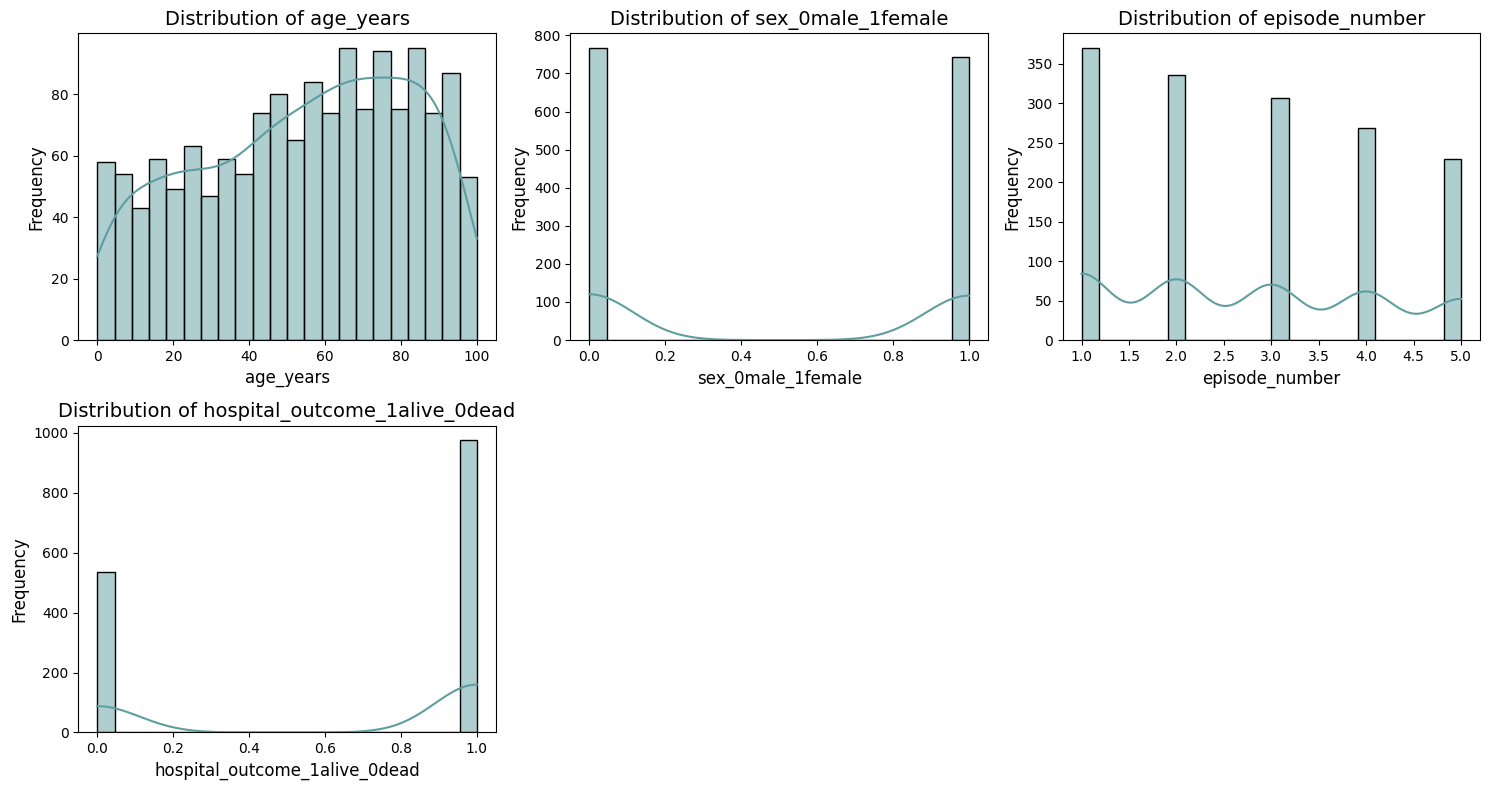

In [20]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

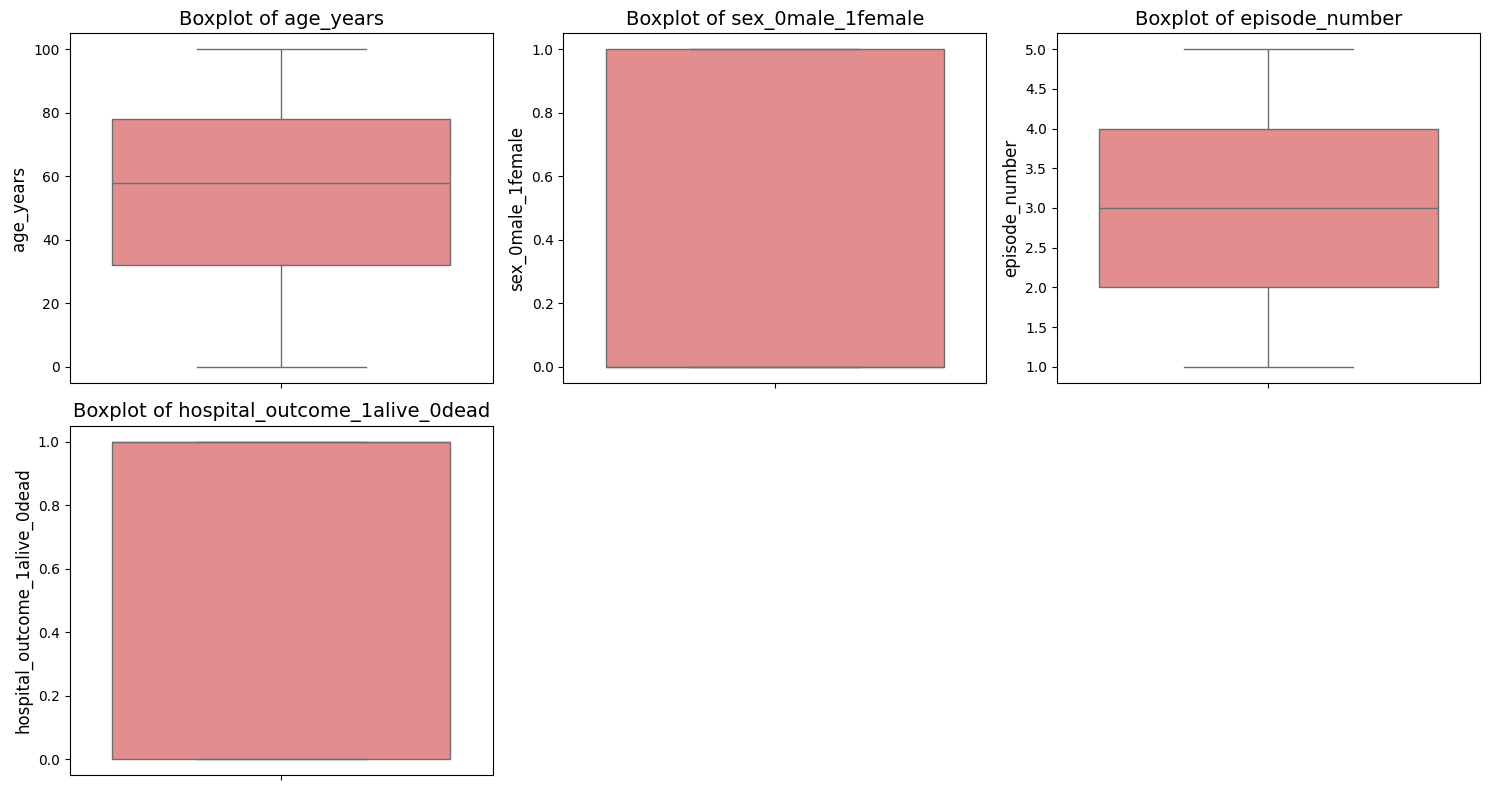

In [21]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

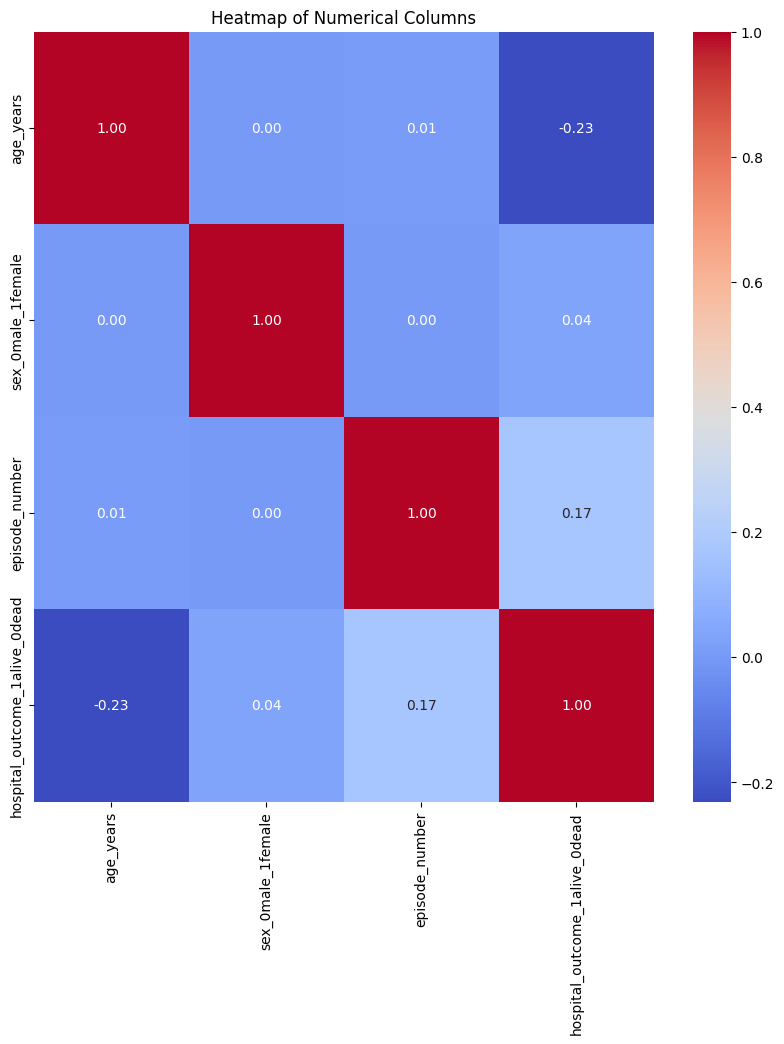

In [22]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [23]:
# Renaming columns

df = df.rename(columns = {"age_years": "age", "sex_0male_1female": "female", 
                             "episode_number": "episode", "hospital_outcome_1alive_0dead": "dead"})

In [24]:
X = df.drop(columns=['dead'])
y = df['dead']

In [25]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [26]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [29]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.6205128205128205, 0.6256410256410256, 0.5384615384615384, 0.4794871794871795, 0.6384615384615384, 0.617948717948718, 0.4717948717948718, 0.49230769230769234, 0.6230769230769231]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.62      0.60       182
           1       0.65      0.62      0.64       208

    accuracy                           0.62       390
   macro avg       0.62      0.62      0.62       390
weighted avg       0.62      0.62      0.62       390

Confusion Matrix:
 [[113  69]
 [ 79 129]]


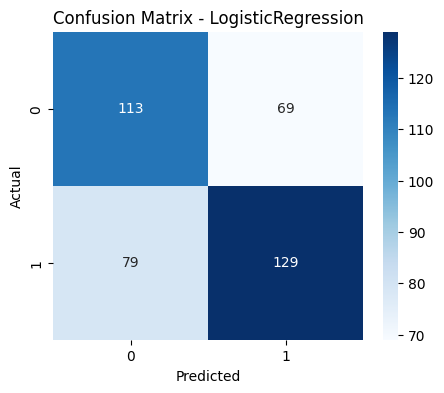

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.63      0.61       182
           1       0.66      0.62      0.64       208

    accuracy                           0.63       390
   macro avg       0.63      0.63      0.63       390
weighted avg       0.63      0.63      0.63       390

Confusion Matrix:
 [[115  67]
 [ 79 129]]


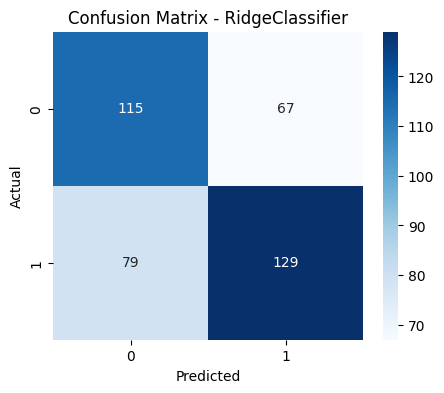

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.63      0.56       182
           1       0.59      0.46      0.52       208

    accuracy                           0.54       390
   macro avg       0.54      0.54      0.54       390
weighted avg       0.55      0.54      0.54       390

Confusion Matrix:
 [[114  68]
 [112  96]]


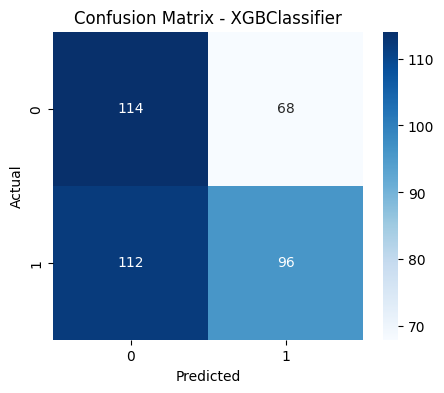

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.55      0.50       182
           1       0.52      0.42      0.47       208

    accuracy                           0.48       390
   macro avg       0.49      0.49      0.48       390
weighted avg       0.49      0.48      0.48       390

Confusion Matrix:
 [[101  81]
 [120  88]]


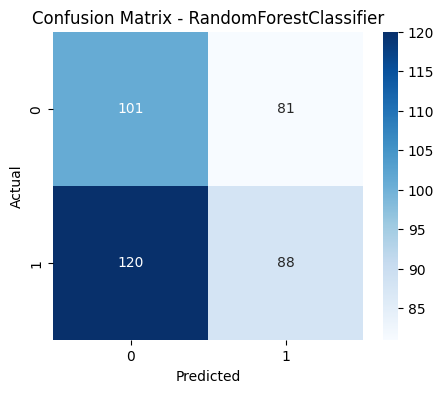

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63       182
           1       0.67      0.63      0.65       208

    accuracy                           0.64       390
   macro avg       0.64      0.64      0.64       390
weighted avg       0.64      0.64      0.64       390

Confusion Matrix:
 [[118  64]
 [ 77 131]]


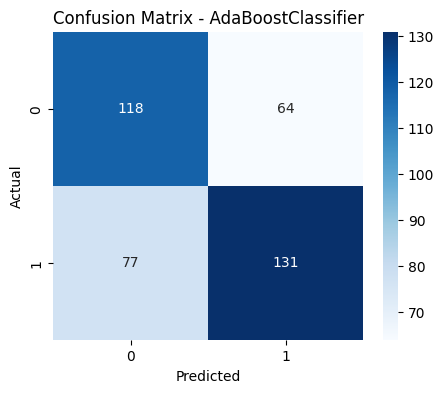

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.74      0.64       182
           1       0.69      0.51      0.59       208

    accuracy                           0.62       390
   macro avg       0.63      0.63      0.62       390
weighted avg       0.63      0.62      0.61       390

Confusion Matrix:
 [[134  48]
 [101 107]]


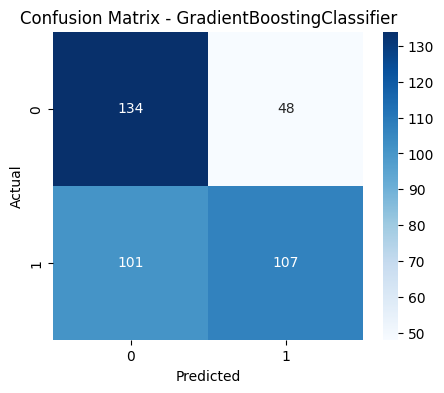

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.57      0.51       182
           1       0.53      0.42      0.47       208

    accuracy                           0.49       390
   macro avg       0.50      0.50      0.49       390
weighted avg       0.50      0.49      0.49       390

Confusion Matrix:
 [[104  78]
 [120  88]]


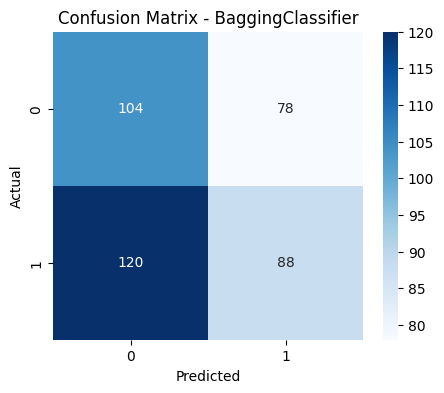

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.66      0.55       182
           1       0.54      0.35      0.42       208

    accuracy                           0.49       390
   macro avg       0.50      0.50      0.48       390
weighted avg       0.51      0.49      0.48       390

Confusion Matrix:
 [[120  62]
 [136  72]]


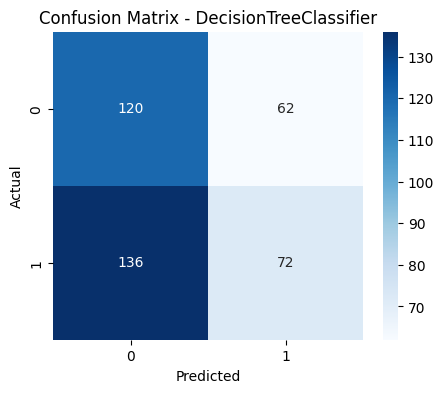

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.77      0.66       182
           1       0.71      0.49      0.58       208

    accuracy                           0.62       390
   macro avg       0.64      0.63      0.62       390
weighted avg       0.65      0.62      0.62       390

Confusion Matrix:
 [[141  41]
 [106 102]]


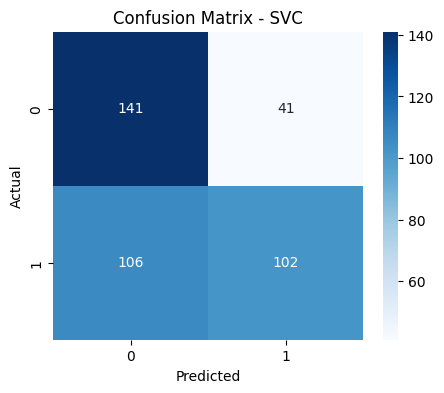

In [30]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()